In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Kik-Net Data/attributes_fixed.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,10,24,29,33,47,48,66,81,82,123,124) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df1=df[(df['MT_Magnitude_']>= 3.5) & (df['MT_Magnitude_'] <= 7)&(df['rjb_0'] >=30) &(df['rjb_0'] <=300)&(df['Tectonic_Garcia_'] ==1)]

In [ ]:
from scipy import stats
df1['d5_75_new'] = stats.gmean(df1.loc[:,['D5_75_EW2','D5_75_NS2']], axis=1)
df1['d5_95_new']=stats.gmean(df1.loc[:,['D5_95_EW2','D5_95_NS2']], axis=1)
df1['d20_80_new']=stats.gmean(df1.loc[:,['D20_80_EW2','D20_80_NS2']], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df2=df1[['MT_Magnitude_','rrup_0','Vs30','d5_75_new','d5_95_new','d20_80_new']]

In [ ]:
df2.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
input_var=df2[['MT_Magnitude_','rrup_0']]

input_var.head()

,MT_Magnitude_,rrup_0
242,4.3,201.327851
243,4.3,267.443533
244,4.3,147.362858
245,4.3,137.572160
246,4.3,135.336606


In [ ]:
y_var=df2[['d20_80_new']]
y_var=np.log(y_var)
y_var=np.array(y_var)
y_var

array([[2.08478206],
       [1.60966386],
       [1.58005895],
       ...,
       [2.01410238],
       [2.4234162 ],
       [2.12773543]])

In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(input_var,y_var,test_size=0.3, random_state=21)

In [ ]:
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import keras.models
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
tf.random.set_seed(55)

In [ ]:
model=Sequential([Dense(units=5, input_shape=(2,), activation='relu'),
                  Dense(units=1, activation='linear')
                 ])

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')

In [ ]:
history=model.fit(X_train, y_train,batch_size=64, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
577/577 [==============================] - 14s 2ms/step - loss: 2.2072 - val_loss: 0.3125
Epoch 2/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2890 - val_loss: 0.2479
Epoch 3/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2468 - val_loss: 0.2392
Epoch 4/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2334 - val_loss: 0.2374
Epoch 5/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2371 - val_loss: 0.2372
Epoch 6/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2378 - val_loss: 0.2367
Epoch 7/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2371 - val_loss: 0.2339
Epoch 8/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2313 - val_loss: 0.2366
Epoch 9/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2316 - val_loss: 0.2324
Epoch 10/20
577/577 [==============================] - 1s 1ms/step - loss: 0.2287 - val_loss: 0.232

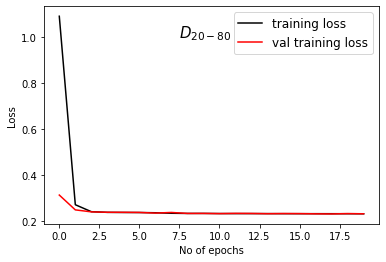

In [ ]:
history_dict=history.history
    
loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
    
plt.plot(loss_values, 'black', label='training loss')
plt.plot(val_loss_values, 'red', label='val training loss')
plt.legend(fontsize=12)
plt.xlabel('No of epochs')
plt.ylabel('Loss')
plt.text(7.5,1.0, '$D_{20-80}$', fontsize=15)
plt.show()